# Exercises of talk 7

In this practical session, we are going to be coding the problem that we discussed at the start of the talk: how to use kernels to solve non-linear classification problems.
The techniques used to divide a set of observations in the decision space using hyperplanes are usually referred to as **Support Vector Machines** (abbreviated as SVMs). The reason why they are called that way is because what they do is to maximise the distance of the hyperplane to the support vectors, which are the data points that are closest to the decisiom surface.

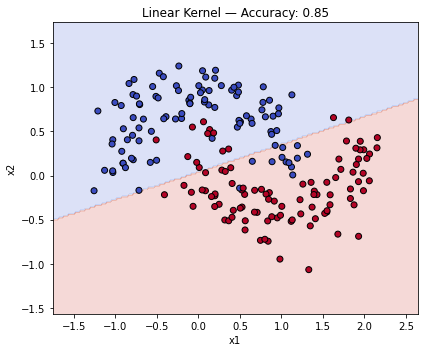

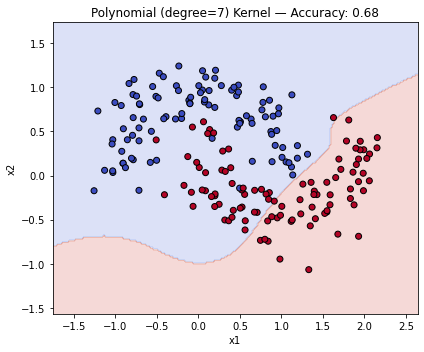

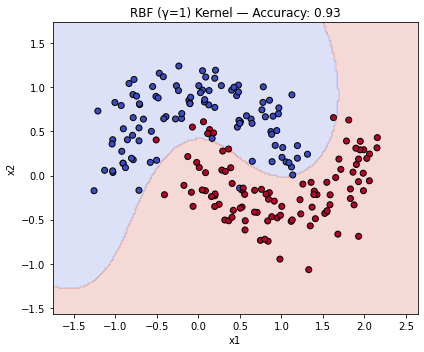

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic 2D data (nonlinear)
X, y = make_moons(n_samples=200, noise=0.2, random_state=48)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper: plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.tight_layout()
    plt.show()

# Train and plot SVMs with different kernels
kernels = {
    "Linear": SVC(kernel="linear", C=1),
    "Polynomial (degree=7)": SVC(kernel="poly", degree=7, C=1),
    "RBF (γ=1)": SVC(kernel="rbf", gamma=1, C=1)
}

for name, clf in kernels.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    plot_decision_boundary(clf, X, y, f"{name} Kernel — Accuracy: {acc:.2f}")


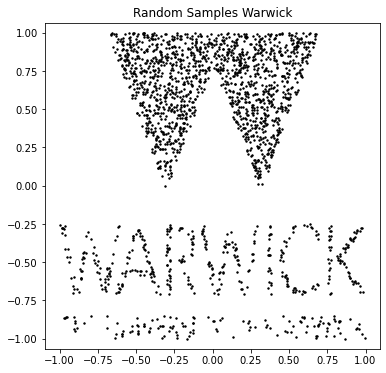

ValueError: 'c' argument has 200 elements, which is inconsistent with 'x' and 'y' with size 2000.

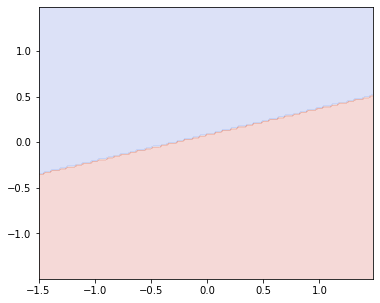

In [ ]:
from skimage import io, color

# Load image
img = io.imread("warwick.jpg")  # should be a black-and-white silhouette
gray = color.rgb2gray(img)

# Threshold to get a binary mask
mask = gray < 0.5  # black = foreground

# Get coordinates of black pixels
coords = np.column_stack(np.where(mask))

# Rescale to [-1, 1] square
coords = coords.astype(float)
coords[:, 0] = 2 * (coords[:, 0] - coords[:, 0].min()) / (coords[:, 0].ptp()) - 1
coords[:, 1] = 2 * (coords[:, 1] - coords[:, 1].min()) / (coords[:, 1].ptp()) - 1

# Flip x-axis for natural orientation
coords[:, 0] *= -1

# Subsample if too many points
n_points = 2000
idx = np.random.choice(len(coords), size=n_points, replace=False)
X = coords[idx]

# Visualise
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 1], X[:, 0], s=2, color='black')  # note flipped axes
plt.title("Random Samples Warwick")
plt.axis("equal")
plt.show()


